In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/who-is-the-real-winner/sample_submission.csv
/kaggle/input/who-is-the-real-winner/train.csv
/kaggle/input/who-is-the-real-winner/test.csv
/kaggle/input/answer/answers.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv("/kaggle/input/who-is-the-real-winner/train.csv")
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


In [4]:
df.size

18531

In [5]:
missing_data = df.isnull()
missing_data.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

ID
ID
False    2059
Name: count, dtype: int64

Candidate
Candidate
False    2059
Name: count, dtype: int64

Constituency ∇
Constituency ∇
False    2059
Name: count, dtype: int64

Party
Party
False    2059
Name: count, dtype: int64

Criminal Case
Criminal Case
False    2059
Name: count, dtype: int64

Total Assets
Total Assets
False    2059
Name: count, dtype: int64

Liabilities
Liabilities
False    2059
Name: count, dtype: int64

state
state
False    2059
Name: count, dtype: int64

Education
Education
False    2059
Name: count, dtype: int64



In [7]:
df.dtypes

ID                 int64
Candidate         object
Constituency ∇    object
Party             object
Criminal Case      int64
Total Assets      object
Liabilities       object
state             object
Education         object
dtype: object

In [8]:
unique_units = set()

for value in df['Total Assets']:
    units = value.split()[-1]
    unique_units.add(units)

print("Unique units in the 'Total Assets' column:", unique_units)

Unique units in the 'Total Assets' column: {'Crore+', 'Lac+', '0', 'Thou+'}


In [9]:
df1 = pd.read_csv("/kaggle/input/who-is-the-real-winner/test.csv")
df1.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH


In [10]:
u_1 = set()

for value in df1['Liabilities']:
    units = value.split()[-1]
    u_1.add(units)

print("Unique units in the 'Liabilities' column:", u_1)

Unique units in the 'Liabilities' column: {'Crore+', 'Lac+', '0', 'Thou+'}


In [11]:
u_1 = set()

for value in df1['Total Assets']:
    units = value.split()[-1]
    u_1.add(units)

print("Unique units in the 'Total Assets' column:", u_1)

Unique units in the 'Total Assets' column: {'Crore+', 'Lac+', '0', 'Thou+'}


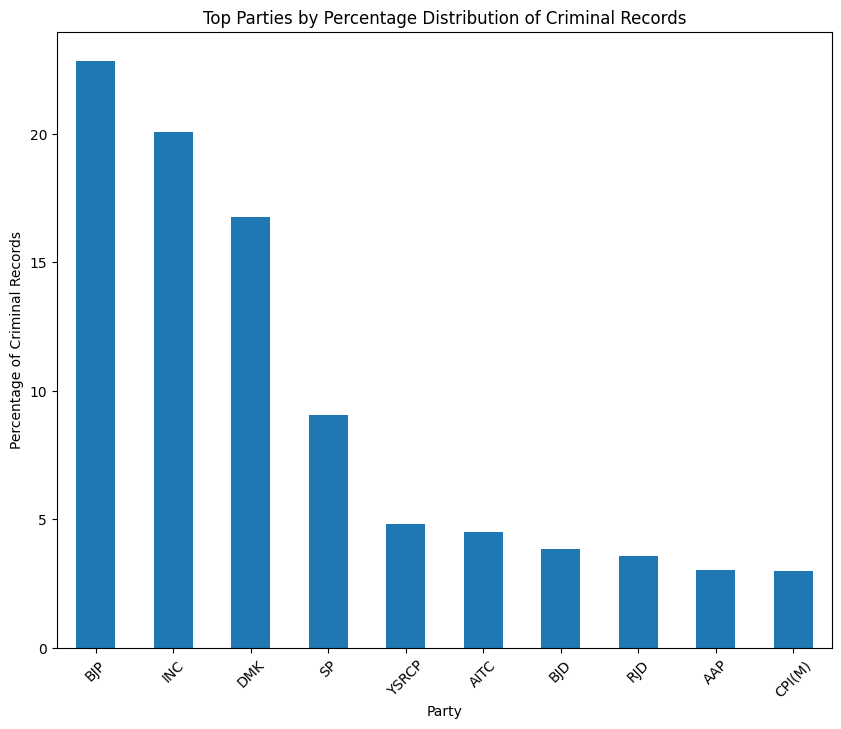

In [12]:
party_crime = df.groupby('Party')['Criminal Case'].sum().sort_values(ascending=False)


party_crime_percent = (party_crime / party_crime.sum()) * 100


plt.figure(figsize=(10, 8))
party_crime_percent.head(10).plot(kind='bar')
plt.title('Top Parties by Percentage Distribution of Criminal Records')
plt.xlabel('Party')
plt.ylabel('Percentage of Criminal Records')
plt.xticks(rotation=45)
plt.show()

In [13]:
u_0 = set()

for value in df['Liabilities']:
    units = value.split()[-1]  
    u_0.add(units)


print("Unique units in the 'Liabilities' column:", u_0)

Unique units in the 'Liabilities' column: {'Lac+', 'Thou+', 'Hund+', 'Crore+', '0'}


In [14]:
conversion_factors = {
    'Crore+': 1,
    'Lac+': 0.01,
    'Thou+': 0.0001,
    'Hund+': 0.00001,
    "0": 0,
}


def convert_to_crore(value, unit):
    factor = conversion_factors.get(unit, None)
    if factor is not None:
        return value * factor
    else:
        raise ValueError("Conversion factor for unit '{}' is not defined.".format(unit))


def convert_assets_to_crore(value):
    parts = value.split()
    amount = float(parts[0])
    unit = parts[-1]
    return convert_to_crore(amount, unit)

df['Liabilities (Crore)'] = df['Liabilities'].apply(convert_assets_to_crore)
df['Total Assets (Crore)'] = df['Total Assets'].apply(convert_assets_to_crore)

df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education,Liabilities (Crore),Total Assets (Crore)
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass,2.00,211.0
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass,0.00,1.0
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate,0.22,7.0
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate,0.24,9.0
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass,0.61,2.0


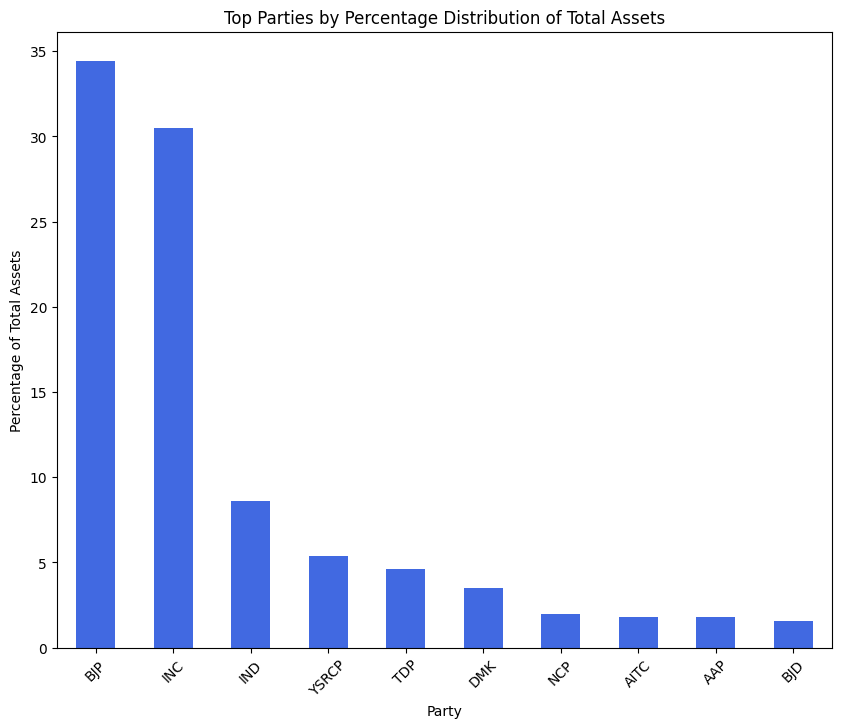

In [15]:
party_wealth = df.groupby('Party')['Total Assets (Crore)'].sum().sort_values(ascending=False)

party_wealth_percent = (party_wealth / party_wealth.sum()) * 100

plt.figure(figsize=(10, 8))
party_wealth_percent.head(10).plot(kind='bar', color='royalblue')  
plt.title('Top Parties by Percentage Distribution of Total Assets')
plt.xlabel('Party')
plt.ylabel('Percentage of Total Assets')
plt.xticks(rotation=45)
plt.show()

In [16]:
df['Total Assets (Crore)'].dtype

dtype('float64')

In [17]:
df["Total Assets (Crore)"] = df["Total Assets (Crore)"]/df["Total Assets (Crore)"].max()
df["Liabilities (Crore)"] = df["Liabilities (Crore)"]/df["Liabilities (Crore)"].max()
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education,Liabilities (Crore),Total Assets (Crore)
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass,0.002270,0.166535
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass,0.000000,0.000789
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate,0.000250,0.005525
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate,0.000272,0.007103
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass,0.000692,0.001579


In [18]:
df['Party'].value_counts()

Party
BJP                         862
INC                         365
AITC                        130
AAP                          94
YSRCP                        86
DMK                          73
BJD                          65
SP                           62
CPI(M)                       43
RJD                          42
IND                          38
NCP                          34
AIADMK                       34
JD(U)                        32
SHS                          29
NPP                          20
JMM                          14
NDPP                          9
TDP                           8
JD(S)                         7
Sikkim Krantikari Morcha      5
CPI                           4
Tipra Motha Party             3
Name: count, dtype: int64

In [19]:
df['state'].value_counts()

state
UTTAR PRADESH        224
WEST BENGAL          171
MAHARASHTRA          155
MADHYA PRADESH       140
KARNATAKA            132
TAMIL NADU           117
BIHAR                115
GUJARAT              108
RAJASTHAN            102
ANDHRA PRADESH        94
ODISHA                87
PUNJAB                66
CHHATTISGARH          58
ASSAM                 57
KERALA                52
HARYANA               47
HIMACHAL PRADESH      41
DELHI                 39
UTTARAKHAND           39
ARUNACHAL PRADESH     37
MANIPUR               36
TRIPURA               35
JHARKHAND             32
NAGALAND              24
GOA                   21
MEGHALAYA             14
PUDUCHERRY            11
SIKKIM                 5
Name: count, dtype: int64

In [20]:
df['Constituency ∇'].value_counts()

Constituency ∇
SAGAR              3
ISLAMPUR           3
SHIVAJINAGAR       2
JALALABAD          2
SHAHPUR            2
                  ..
KUPPAM             1
PANISAGAR          1
HALIYAL            1
ALLAHABAD NORTH    1
TALIHA             1
Name: count, Length: 2037, dtype: int64

In [21]:
df.drop('Constituency ∇', axis=1, inplace=True)
df.head()

,ID,Candidate,Party,Criminal Case,Total Assets,Liabilities,state,Education,Liabilities (Crore),Total Assets (Crore)
0,0,M.K. Mohan,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass,0.002270,0.166535
1,1,Khatik Ramesh Prasad,BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass,0.000000,0.000789
2,2,Dr. Mantar Gowda,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate,0.000250,0.005525
3,3,Kundan Kumar,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate,0.000272,0.007103
4,4,Swapan Majumder,BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass,0.000692,0.001579


In [22]:
df.drop(['ID', 'Total Assets', 'Liabilities'], axis=1, inplace=True)
df.head()

,Candidate,Party,Criminal Case,state,Education,Liabilities (Crore),Total Assets (Crore)
0,M.K. Mohan,DMK,4,TAMIL NADU,8th Pass,0.002270,0.166535
1,Khatik Ramesh Prasad,BJP,0,MADHYA PRADESH,12th Pass,0.000000,0.000789
2,Dr. Mantar Gowda,INC,0,KARNATAKA,Post Graduate,0.000250,0.005525
3,Kundan Kumar,BJP,0,BIHAR,Post Graduate,0.000272,0.007103
4,Swapan Majumder,BJP,2,WEST BENGAL,8th Pass,0.000692,0.001579


In [23]:
from sklearn.preprocessing import LabelEncoder

data = df['Party'].tolist()

label_encoder = LabelEncoder()

label_encoder.fit(data)

category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df['Encoded_Party'] = label_encoder.fit_transform(df['Party'])

df.head()

,Candidate,Party,Criminal Case,state,Education,Liabilities (Crore),Total Assets (Crore),Encoded_Party
0,M.K. Mohan,DMK,4,TAMIL NADU,8th Pass,0.002270,0.166535,7
1,Khatik Ramesh Prasad,BJP,0,MADHYA PRADESH,12th Pass,0.000000,0.000789,4
2,Dr. Mantar Gowda,INC,0,KARNATAKA,Post Graduate,0.000250,0.005525,8
3,Kundan Kumar,BJP,0,BIHAR,Post Graduate,0.000272,0.007103,4
4,Swapan Majumder,BJP,2,WEST BENGAL,8th Pass,0.000692,0.001579,4


In [24]:
category_mapping

{'AAP': 0,
 'AIADMK': 1,
 'AITC': 2,
 'BJD': 3,
 'BJP': 4,
 'CPI': 5,
 'CPI(M)': 6,
 'DMK': 7,
 'INC': 8,
 'IND': 9,
 'JD(S)': 10,
 'JD(U)': 11,
 'JMM': 12,
 'NCP': 13,
 'NDPP': 14,
 'NPP': 15,
 'RJD': 16,
 'SHS': 17,
 'SP': 18,
 'Sikkim Krantikari Morcha': 19,
 'TDP': 20,
 'Tipra Motha Party': 21,
 'YSRCP': 22}

In [25]:
from sklearn.preprocessing import LabelEncoder

data = df['state'].tolist()

label_encoder = LabelEncoder()

label_encoder.fit(data)

category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df['Encoded_state'] = label_encoder.fit_transform(df['state'])

df.head()

,Candidate,Party,Criminal Case,state,Education,Liabilities (Crore),Total Assets (Crore),Encoded_Party,Encoded_state
0,M.K. Mohan,DMK,4,TAMIL NADU,8th Pass,0.002270,0.166535,7,23
1,Khatik Ramesh Prasad,BJP,0,MADHYA PRADESH,12th Pass,0.000000,0.000789,4,13
2,Dr. Mantar Gowda,INC,0,KARNATAKA,Post Graduate,0.000250,0.005525,8,11
3,Kundan Kumar,BJP,0,BIHAR,Post Graduate,0.000272,0.007103,4,3
4,Swapan Majumder,BJP,2,WEST BENGAL,8th Pass,0.000692,0.001579,4,27


In [26]:
category_mapping

{'ANDHRA PRADESH': 0,
 'ARUNACHAL PRADESH': 1,
 'ASSAM': 2,
 'BIHAR': 3,
 'CHHATTISGARH': 4,
 'DELHI': 5,
 'GOA': 6,
 'GUJARAT': 7,
 'HARYANA': 8,
 'HIMACHAL PRADESH': 9,
 'JHARKHAND': 10,
 'KARNATAKA': 11,
 'KERALA': 12,
 'MADHYA PRADESH': 13,
 'MAHARASHTRA': 14,
 'MANIPUR': 15,
 'MEGHALAYA': 16,
 'NAGALAND': 17,
 'ODISHA': 18,
 'PUDUCHERRY': 19,
 'PUNJAB': 20,
 'RAJASTHAN': 21,
 'SIKKIM': 22,
 'TAMIL NADU': 23,
 'TRIPURA': 24,
 'UTTAR PRADESH': 25,
 'UTTARAKHAND': 26,
 'WEST BENGAL': 27}

In [27]:
df.dtypes

Candidate                object
Party                    object
Criminal Case             int64
state                    object
Education                object
Liabilities (Crore)     float64
Total Assets (Crore)    float64
Encoded_Party             int64
Encoded_state             int64
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder

data = df['Education'].tolist()

label_encoder = LabelEncoder()

label_encoder.fit(data)

category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df['Encoded_Education'] = label_encoder.fit_transform(df['Education'])

df.head()

,Candidate,Party,Criminal Case,state,Education,Liabilities (Crore),Total Assets (Crore),Encoded_Party,Encoded_state,Encoded_Education
0,M.K. Mohan,DMK,4,TAMIL NADU,8th Pass,0.002270,0.166535,7,23,3
1,Khatik Ramesh Prasad,BJP,0,MADHYA PRADESH,12th Pass,0.000000,0.000789,4,13,1
2,Dr. Mantar Gowda,INC,0,KARNATAKA,Post Graduate,0.000250,0.005525,8,11,9
3,Kundan Kumar,BJP,0,BIHAR,Post Graduate,0.000272,0.007103,4,3,9
4,Swapan Majumder,BJP,2,WEST BENGAL,8th Pass,0.000692,0.001579,4,27,3


In [29]:
category_mapping

{'10th Pass': 0,
 '12th Pass': 1,
 '5th Pass': 2,
 '8th Pass': 3,
 'Doctorate': 4,
 'Graduate': 5,
 'Graduate Professional': 6,
 'Literate': 7,
 'Others': 8,
 'Post Graduate': 9}

In [30]:
df[["Encoded_Party", "Encoded_state", "Encoded_Education", "Criminal Case"]] = df[["Encoded_Party", "Encoded_state", "Encoded_Education", "Criminal Case"]].astype("float")
df.dtypes

Candidate                object
Party                    object
Criminal Case           float64
state                    object
Education                object
Liabilities (Crore)     float64
Total Assets (Crore)    float64
Encoded_Party           float64
Encoded_state           float64
Encoded_Education       float64
dtype: object

In [31]:
df.head()

,Candidate,Party,Criminal Case,state,Education,Liabilities (Crore),Total Assets (Crore),Encoded_Party,Encoded_state,Encoded_Education
0,M.K. Mohan,DMK,4.0,TAMIL NADU,8th Pass,0.002270,0.166535,7.0,23.0,3.0
1,Khatik Ramesh Prasad,BJP,0.0,MADHYA PRADESH,12th Pass,0.000000,0.000789,4.0,13.0,1.0
2,Dr. Mantar Gowda,INC,0.0,KARNATAKA,Post Graduate,0.000250,0.005525,8.0,11.0,9.0
3,Kundan Kumar,BJP,0.0,BIHAR,Post Graduate,0.000272,0.007103,4.0,3.0,9.0
4,Swapan Majumder,BJP,2.0,WEST BENGAL,8th Pass,0.000692,0.001579,4.0,27.0,3.0


In [32]:
from sklearn.preprocessing import LabelEncoder

data = df['state'].tolist()

label_encoder = LabelEncoder()

label_encoder.fit(data)

category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df1['Encoded_state'] = label_encoder.fit_transform(df1['state'])

df1.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Encoded_state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA,14
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL,27
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA,14
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL,27
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH,25


In [33]:
from sklearn.preprocessing import LabelEncoder

data = df['Party'].tolist()

label_encoder = LabelEncoder()

label_encoder.fit(data)

category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df1['Encoded_Party'] = label_encoder.fit_transform(df1['Party'])

df1.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Encoded_state,Encoded_Party
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA,14,9
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL,27,2
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA,14,13
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL,27,2
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH,25,18


In [34]:
conversion_factors = {
    'Crore+': 1,
    'Lac+': 0.01,
    'Thou+': 0.0001,
    'Hund+': 0.00001,
    "0": 0,
}

def convert_to_crore(value, unit):
    factor = conversion_factors.get(unit, None)
    if factor is not None:
        return value * factor
    else:
        raise ValueError("Conversion factor for unit '{}' is not defined.".format(unit))

def convert_assets_to_crore(value):
    parts = value.split()
    amount = float(parts[0])
    unit = parts[-1]
    return convert_to_crore(amount, unit)

df1['Liabilities (Crore)'] = df1['Liabilities'].apply(convert_assets_to_crore)
df1['Total Assets (Crore)'] = df1['Total Assets'].apply(convert_assets_to_crore)

df1.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Encoded_state,Encoded_Party,Liabilities (Crore),Total Assets (Crore)
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA,14,9,11.00,70.0
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL,27,2,0.13,2.0
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA,14,13,1.00,49.0
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL,27,2,0.00,2.0
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH,25,18,2.00,16.0


In [35]:
df1["Total Assets (Crore)"] = df1["Total Assets (Crore)"]/df1["Total Assets (Crore)"].max()
df1["Liabilities (Crore)"] = df1["Liabilities (Crore)"]/df1["Liabilities (Crore)"].max()
df1.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Encoded_state,Encoded_Party,Liabilities (Crore),Total Assets (Crore)
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA,14,9,0.038869,0.049540
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL,27,2,0.000459,0.001415
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA,14,13,0.003534,0.034678
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL,27,2,0.000000,0.001415
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH,25,18,0.007067,0.011323


In [36]:
df1.drop(['ID', 'Total Assets', 'Liabilities', 'Constituency ∇'], axis=1, inplace=True)
df1.head()

,Candidate,Party,Criminal Case,state,Encoded_state,Encoded_Party,Liabilities (Crore),Total Assets (Crore)
0,Geeta Bharat Jain,IND,2,MAHARASHTRA,14,9,0.038869,0.049540
1,Becharam Manna,AITC,1,WEST BENGAL,27,2,0.000459,0.001415
2,Sunil Vijay Tingre,NCP,3,MAHARASHTRA,14,13,0.003534,0.034678
3,Asit Mazumder (Tapan),AITC,1,WEST BENGAL,27,2,0.000000,0.001415
4,Hriday Narayan Singh Patel,SP,0,UTTAR PRADESH,25,18,0.007067,0.011323


In [37]:
df1[["Encoded_Party", "Encoded_state", "Criminal Case"]] = df1[["Encoded_Party", "Encoded_state", "Criminal Case"]].astype("float")
df1.dtypes

Candidate                object
Party                    object
Criminal Case           float64
state                    object
Encoded_state           float64
Encoded_Party           float64
Liabilities (Crore)     float64
Total Assets (Crore)    float64
dtype: object

In [38]:
X_test_pre = df1[['Criminal Case', 'Total Assets (Crore)', 'Liabilities (Crore)', 'Encoded_Party', 'Encoded_state']]

In [39]:
X_test_pre

,Criminal Case,Total Assets (Crore),Liabilities (Crore),Encoded_Party,Encoded_state
0,2.0,0.049540,0.038869,9.0,14.0
1,1.0,0.001415,0.000459,2.0,27.0
2,3.0,0.034678,0.003534,13.0,14.0
3,1.0,0.001415,0.000000,2.0,27.0
4,0.0,0.011323,0.007067,18.0,25.0
...,...,...,...,...,...
1369,0.0,0.000708,0.000000,4.0,27.0
1370,1.0,0.000000,0.000459,3.0,18.0
1371,1.0,0.003539,0.000000,8.0,3.0
1372,1.0,0.001415,0.000177,4.0,9.0


In [40]:
X_test_pre_norm = preprocessing.StandardScaler().fit(X_test_pre).transform(X_test_pre.astype(float))
X_test_pre_norm[0: 5]

array([[ 0.02151086,  1.0546743 ,  0.58361103,  0.42842441, -0.07584846],
       [-0.12776149, -0.19267555, -0.16507163, -0.89482093,  1.453277  ],
       [ 0.17078322,  0.66946332, -0.10514947,  1.18456461, -0.07584846],
       [-0.12776149, -0.19267555, -0.17402552, -0.89482093,  1.453277  ],
       [-0.27703385,  0.06413177, -0.03627342,  2.12973985,  1.21802693]])

In [41]:
df.columns

Index(['Candidate', 'Party', 'Criminal Case', 'state', 'Education',
       'Liabilities (Crore)', 'Total Assets (Crore)', 'Encoded_Party',
       'Encoded_state', 'Encoded_Education'],
      dtype='object')

In [42]:
X = df[['Criminal Case', 'Total Assets (Crore)', 'Liabilities (Crore)', 'Encoded_Party',
       'Encoded_state']]

In [43]:
y = df["Encoded_Education"]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1647, 5) (1647,)
Test set: (412, 5) (412,)


In [45]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm[0: 5]

array([[-0.38813941, -0.16714256, -0.05465575, -0.53331   ,  1.18749112],
       [-0.38813941, -0.2053939 , -0.09723773,  0.22016336, -1.25856661],
       [-0.38813941, -0.2053939 , -0.09590704,  0.22016336,  0.72157536],
       [-0.38813941, -0.22451957, -0.09901198,  1.3503734 ,  0.2556596 ],
       [-0.16853597, -0.07151421, -0.05465575, -0.53331   , -0.21025615]])

In [46]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0: 5]

array([[-0.32979371, -0.0537893 , -0.23255439,  0.84518246, -1.56958892],
       [-0.32979371, -0.11215111, -0.13787419,  0.27928564, -0.13810993],
       [-0.32979371, -0.25805564, -0.16528162, -0.47524344, -0.61526959],
       [ 0.0330234 , -0.19969382, -0.18895167,  0.27928564, -0.01882001],
       [-0.32979371, -0.22887473, -0.22757122, -0.47524344, -0.13810993]])

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


Ks = 100
f1 = np.zeros((Ks-1))

for n in range(1, Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm, y_train)
    yhat = neigh.predict(X_test_norm)
    f1[n-1] = f1_score(y_test, yhat, average='weighted')


best_K = np.argmax(f1) + 1 
best_f1 = f1[best_K - 1] 

f1

array([0.1696551 , 0.15343095, 0.17023331, 0.17963718, 0.17947842,
       0.19232151, 0.19516963, 0.16840795, 0.17474586, 0.19038   ,
       0.18893302, 0.20249134, 0.20361949, 0.19054892, 0.20623299,
       0.19283148, 0.19259142, 0.18468194, 0.19116941, 0.18400789,
       0.17522795, 0.181819  , 0.18982193, 0.19167383, 0.18736356,
       0.21324009, 0.20461786, 0.2024522 , 0.19876181, 0.20828866,
       0.19737446, 0.19417275, 0.18557904, 0.18078942, 0.18398191,
       0.18270337, 0.18997673, 0.19220058, 0.19548862, 0.20430788,
       0.21148169, 0.20484184, 0.20141449, 0.20324484, 0.2095399 ,
       0.20398504, 0.20917309, 0.20336717, 0.19506118, 0.19944846,
       0.2046067 , 0.19677832, 0.20019895, 0.20684493, 0.2069304 ,
       0.21986149, 0.21089148, 0.20805433, 0.2090767 , 0.2148735 ,
       0.2202806 , 0.21537005, 0.21869443, 0.20857771, 0.20545714,
       0.20887736, 0.20102201, 0.20324276, 0.20658122, 0.19984392,
       0.20671838, 0.19516905, 0.19897496, 0.20217079, 0.21007

In [48]:
best_K, best_f1

(61, 0.22028059758911453)

In [49]:
f1.max()

0.22028059758911453

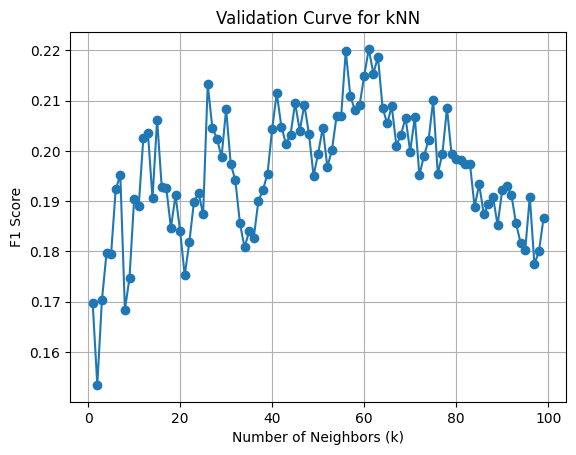

In [50]:
import matplotlib.pyplot as plt

plt.plot(range(1, 100), f1, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.title('Validation Curve for kNN')
plt.grid(True)
plt.show()

In [51]:
X_train_norm_1 = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [52]:
X_train_norm_1

array([[ 0.46679808,  4.05261459, -0.00776657,  0.04354719,  0.97372346],
       [-0.37335686, -0.21457701, -0.10541735, -0.52155994, -0.19599451],
       [-0.37335686, -0.09265725, -0.09467577,  0.23191623, -0.42993811],
       ...,
       [-0.37335686,  0.02926251, -0.06391577, -0.52155994,  1.20766705],
       [-0.16331812,  0.27310203, -0.05952149,  1.17376144, -0.07902271],
       [-0.37335686, -0.23266178, -0.10541735, -0.52155994, -1.59965607]])

In [53]:
df1.head()

,Candidate,Party,Criminal Case,state,Encoded_state,Encoded_Party,Liabilities (Crore),Total Assets (Crore)
0,Geeta Bharat Jain,IND,2.0,MAHARASHTRA,14.0,9.0,0.038869,0.049540
1,Becharam Manna,AITC,1.0,WEST BENGAL,27.0,2.0,0.000459,0.001415
2,Sunil Vijay Tingre,NCP,3.0,MAHARASHTRA,14.0,13.0,0.003534,0.034678
3,Asit Mazumder (Tapan),AITC,1.0,WEST BENGAL,27.0,2.0,0.000000,0.001415
4,Hriday Narayan Singh Patel,SP,0.0,UTTAR PRADESH,25.0,18.0,0.007067,0.011323


In [54]:
neigh = KNeighborsClassifier(n_neighbors = best_K).fit(X_train_norm, y_train)
yhat = neigh.predict(X_test_pre_norm)

In [55]:
from sklearn.preprocessing import LabelEncoder

data = df['Education'].tolist()

label_encoder = LabelEncoder()

label_encoder.fit(data)

Education_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [56]:
numerical_to_category_mapping = {v: k for k, v in Education_mapping.items()}

df1['Education'] = np.vectorize(numerical_to_category_mapping.get)(yhat)

df1.head()

,Candidate,Party,Criminal Case,state,Encoded_state,Encoded_Party,Liabilities (Crore),Total Assets (Crore),Education
0,Geeta Bharat Jain,IND,2.0,MAHARASHTRA,14.0,9.0,0.038869,0.049540,Post Graduate
1,Becharam Manna,AITC,1.0,WEST BENGAL,27.0,2.0,0.000459,0.001415,Post Graduate
2,Sunil Vijay Tingre,NCP,3.0,MAHARASHTRA,14.0,13.0,0.003534,0.034678,Graduate
3,Asit Mazumder (Tapan),AITC,1.0,WEST BENGAL,27.0,2.0,0.000000,0.001415,Post Graduate
4,Hriday Narayan Singh Patel,SP,0.0,UTTAR PRADESH,25.0,18.0,0.007067,0.011323,Post Graduate


In [57]:
df_csv = pd.DataFrame({
    'ID': range(len(df1['Education'])),
    'Education': df1['Education']
})


df_csv.to_csv('estimate_0.csv', index=False) 

In [58]:
from sklearn.preprocessing import LabelEncoder

data = df['state'].tolist()

label_encoder = LabelEncoder()

label_encoder.fit(data)

state_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [59]:
state_mapping

{'ANDHRA PRADESH': 0,
 'ARUNACHAL PRADESH': 1,
 'ASSAM': 2,
 'BIHAR': 3,
 'CHHATTISGARH': 4,
 'DELHI': 5,
 'GOA': 6,
 'GUJARAT': 7,
 'HARYANA': 8,
 'HIMACHAL PRADESH': 9,
 'JHARKHAND': 10,
 'KARNATAKA': 11,
 'KERALA': 12,
 'MADHYA PRADESH': 13,
 'MAHARASHTRA': 14,
 'MANIPUR': 15,
 'MEGHALAYA': 16,
 'NAGALAND': 17,
 'ODISHA': 18,
 'PUDUCHERRY': 19,
 'PUNJAB': 20,
 'RAJASTHAN': 21,
 'SIKKIM': 22,
 'TAMIL NADU': 23,
 'TRIPURA': 24,
 'UTTAR PRADESH': 25,
 'UTTARAKHAND': 26,
 'WEST BENGAL': 27}

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 100)}

Ks = 100
f1_gridsearch = np.zeros((Ks-1))

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_norm_1, y)

for n in range(1, Ks):
    f1_gridsearch[n-1] = grid_search.cv_results_[f'mean_test_score'][n-1]

print("Best k:", grid_search.best_params_['n_neighbors'])

Best k: 25


In [61]:
f1_gridsearch

array([0.1877333 , 0.16532207, 0.17681112, 0.18691525, 0.19701425,
       0.1928471 , 0.1929378 , 0.19260128, 0.19481221, 0.19702717,
       0.19726593, 0.19776509, 0.19686924, 0.20282158, 0.20170442,
       0.19611954, 0.19697096, 0.19895097, 0.2007256 , 0.20146822,
       0.19712527, 0.19688308, 0.20355271, 0.20829901, 0.20859864,
       0.19859642, 0.20105723, 0.20090356, 0.20831323, 0.19930898,
       0.20261202, 0.19825039, 0.19574275, 0.19960988, 0.19232311,
       0.19100564, 0.18928236, 0.19324035, 0.19877068, 0.19677521,
       0.19745412, 0.19451423, 0.19858818, 0.19559093, 0.2006931 ,
       0.20509583, 0.204995  , 0.20539923, 0.19979268, 0.20276636,
       0.20195033, 0.19722349, 0.19673199, 0.19435892, 0.19208082,
       0.1919338 , 0.19312829, 0.19179569, 0.19119424, 0.19020437,
       0.19066405, 0.19160668, 0.18882108, 0.18428572, 0.18494004,
       0.18702453, 0.1868465 , 0.18156248, 0.1787007 , 0.17811296,
       0.17716509, 0.18259714, 0.18288854, 0.18130976, 0.17984

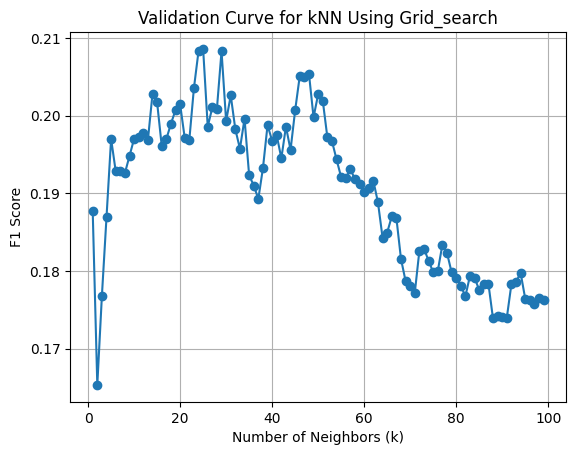

In [62]:
import matplotlib.pyplot as plt

plt.plot(range(1, 100), f1_gridsearch, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.title('Validation Curve for kNN Using Grid_search')
plt.grid(True)
plt.show()

In [63]:
best_knn_model = grid_search.best_estimator_

best_knn_model.set_params(n_neighbors=grid_search.best_params_['n_neighbors'])

y_test_pred_1 = best_knn_model.predict(X_test_pre_norm)

In [64]:
y_test_pred_1

array([5., 9., 5., ..., 5., 1., 9.])

In [65]:
from sklearn.preprocessing import LabelEncoder

data = df['Education'].tolist()

label_encoder = LabelEncoder()

label_encoder.fit(data)

Education_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [66]:
Education_mapping

{'10th Pass': 0,
 '12th Pass': 1,
 '5th Pass': 2,
 '8th Pass': 3,
 'Doctorate': 4,
 'Graduate': 5,
 'Graduate Professional': 6,
 'Literate': 7,
 'Others': 8,
 'Post Graduate': 9}

In [67]:
numerical_to_category_mapping = {v: k for k, v in Education_mapping.items()}

df1['Education-1'] = np.vectorize(numerical_to_category_mapping.get)(y_test_pred_1)

df1.head()

,Candidate,Party,Criminal Case,state,Encoded_state,Encoded_Party,Liabilities (Crore),Total Assets (Crore),Education,Education-1
0,Geeta Bharat Jain,IND,2.0,MAHARASHTRA,14.0,9.0,0.038869,0.049540,Post Graduate,Graduate
1,Becharam Manna,AITC,1.0,WEST BENGAL,27.0,2.0,0.000459,0.001415,Post Graduate,Post Graduate
2,Sunil Vijay Tingre,NCP,3.0,MAHARASHTRA,14.0,13.0,0.003534,0.034678,Graduate,Graduate
3,Asit Mazumder (Tapan),AITC,1.0,WEST BENGAL,27.0,2.0,0.000000,0.001415,Post Graduate,Post Graduate
4,Hriday Narayan Singh Patel,SP,0.0,UTTAR PRADESH,25.0,18.0,0.007067,0.011323,Post Graduate,Post Graduate


In [68]:
df_csv1 = pd.DataFrame({
    'ID': range(len(df1['Education-1'])),
    'Education': df1['Education-1']
})


df_csv1.to_csv('output.csv', index=False) 

In [69]:
df1['Education-1']

0                    Graduate
1               Post Graduate
2                    Graduate
3               Post Graduate
4               Post Graduate
                ...          
1369            Post Graduate
1370    Graduate Professional
1371                 Graduate
1372                12th Pass
1373            Post Graduate
Name: Education-1, Length: 1374, dtype: object